In [34]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# TweetTokenizer as a subset of word_tokenize. TweetTokenizer keeps hashtags intact while word_tokenize doesn't.
from nltk.tokenize import TweetTokenizer
import re
import string
from nltk.stem import PorterStemmer
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [26]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

The twitter_samples contains subsets of five thousand positive_tweets, five thousand negative_tweets, and the full set of 10,000 tweets.

If you used all three datasets, we would introduce duplicates of the positive tweets and negative tweets.
You will select just the five thousand positive tweets and five thousand negative tweets.

In [27]:
strings = twitter_samples.strings('tweets.20150430-223406.json')
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
for strig in strings[:2]:
    print(strig)

RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP
VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY


In [28]:
len(all_positive_tweets),len(all_negative_tweets),len(strings)

(5000, 5000, 20000)

In [29]:
train_pos=all_positive_tweets[:4000]
test_pos=all_positive_tweets[4000:]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

In [30]:
train_y=np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y=np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [31]:
train_x=train_pos+train_neg
test_x=test_pos+test_neg

In [32]:
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))
type(train_x),type(train_y)

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


(list, numpy.ndarray)

In [36]:
freq=build_freqs(train_x,train_y)

In [39]:
# check the output
print("type(freqs) = " + str(type(freq)))
print("len(freqs) = " + str(len(freq.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11428


In [40]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [41]:
freq

{('followfriday', 1.0): 23,
 ('top', 1.0): 30,
 ('engag', 1.0): 7,
 ('member', 1.0): 14,
 ('commun', 1.0): 27,
 ('week', 1.0): 72,
 (':)', 1.0): 2960,
 ('hey', 1.0): 60,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 81,
 ('call', 1.0): 27,
 ('contact', 1.0): 4,
 ('centr', 1.0): 1,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 6,
 ('assist', 1.0): 1,
 ('mani', 1.0): 28,
 ('thank', 1.0): 522,
 ('listen', 1.0): 15,
 ('last', 1.0): 39,
 ('night', 1.0): 55,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 41,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 15,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 57,
 ('blue', 1.0): 8,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 4,
 ('profil', 1.0): 2,
 ('15', 1.0): 4,
 ('day', 1.0): 187,
 ('one', 1.0): 92,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 16,
 ('like', 1.0): 187,
 ('keep', 1.0): 55,
 ('love', 1.0): 336,
 

In [46]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data = []

for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts  
    if (word, 1) in freq:                            #word,1 stands for positiv apperarence in data
        pos = freq[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freq:                            #word,0 records the negative appearence
        neg = freq[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])                    #Here we have the word and number of positive apperence and neg apperence
    

In [47]:
data

[['happi', 162, 18],
 ['merri', 1, 0],
 ['nice', 71, 17],
 ['good', 191, 83],
 ['bad', 14, 54],
 ['sad', 5, 100],
 ['mad', 3, 8],
 ['best', 49, 16],
 ['pretti', 17, 12],
 ['❤', 21, 15],
 [':)', 2960, 2],
 [':(', 1, 3675],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 3, 1],
 ['😍', 1, 0],
 ['♛', 0, 210],
 ['song', 16, 25],
 ['idea', 24, 8],
 ['power', 6, 5],
 ['play', 37, 39],
 ['magnific', 1, 0]]

In [48]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

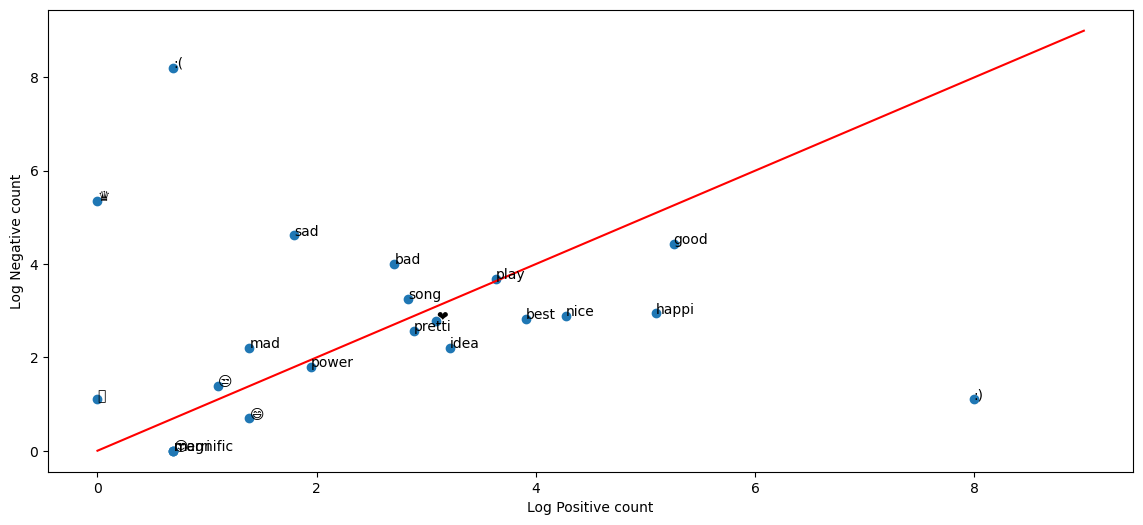

In [60]:
fig, ax = plt.subplots(figsize = (14, 6))
x = np.log([x[1] + 1 for x in data])  
y = np.log([x[2] + 1 for x in data])  
# Plot a dot for each pair of words
ax.scatter(x, y)  
# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range (len(data)):
    ax.annotate(data[i][0],(x[i],y[i]),fontsize=10)
ax.plot([0,9],[0,9],color="red")
plt.show()

### Creating Logistic Regression and Gradient Decent model from scratch

In [65]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''  
    ### START CODE HERE ###
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    return h

In [61]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

In [62]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

In [66]:
# UNQ_C2 GRADED FUNCTION: gradientDescent
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]     
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of h
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))                                                    

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [67]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [113]:
old_theta=np.zeros((3, 1))

In [140]:
#Gradeint decent with one iteration
z_=np.dot(tmp_X,np.zeros((3, 1)))   #finding equation of a line
sigmoid_=sigmoid(z_)                #applying sigmoid activation
sigmoid_                             
m = tmp_X.shape[0]                  #Calculating number of rows
cots=-1/m*(np.dot(tmp_Y.transpose(),np.log(sigmoid_))+np.dot((1-tmp_Y).transpose(),np.log(1-sigmoid_)))#log loss cost function  
update_value=1e-8+1/m*np.dot(tmp_X.transpose(),(tmp_Y-sigmoid_))   #updating value alpha+gradient
new_theta=old_theta+update_value
old_theta=new_theta

In [141]:
new_theta

array([[   1.40000014],
       [1069.38297496],
       [ 827.03900569]])

### Feature extraction

* Shape of input features 3 columns # bias ,positive count and negative count

Bias : 1 ,positive count,negative count

In [170]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)   
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE ###
    
    # loop through each word in the list of words
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [171]:
# Check your function
# test 1
# test on training data
tmp1 = extract_features(train_x[0], freq)
print(tmp1)

[[1.000e+00 3.133e+03 6.100e+01]]


In [172]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freq)
print(tmp2)

[[1. 0. 0.]]


## Training model on train data

In [155]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freq)
# training labels corresponding to X
Y = train_y
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.22521260.
The resulting vector of weights is [6e-08, 0.0005382, -0.0005583]


### Predicting on test data

In [173]:
#predict function
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    ### END CODE HERE ###
    
    return y_pred

In [174]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freq, theta)))    

I am happy -> 0.519275
I am bad -> 0.494347
this movie should have been great. -> 0.515980
great -> 0.516065
great great -> 0.532097
great great great -> 0.548063
great great great great -> 0.563930


In [175]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freq, theta)

array([[0.83110766]])

Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model.

Use your 'predict_tweet' function to make predictions on each tweet in the test set.

If the prediction is > 0.5, set the model's classification 'y_hat' to 1, otherwise set the model's classification 'y_hat' to 0.

A prediction is accurate when the y_hat equals the test_y. Sum up all the instances when they are equal and divide by m.

Hints
* Use np.asarray() to convert a list to a numpy array
* Use numpy.squeeze() to make an (m,1) dimensional array into an (m,) array

In [176]:
#function of testing the model and getting output on the test data


def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    
    ### END CODE HERE ###
    
    return accuracy

In [162]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freq, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


#  Error Analysis

In this part you will see some tweets that your model misclassified. Why do you think the misclassifications happened? Specifically what kind of tweets does your model misclassify?

In [164]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freq, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48942982	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418982	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418982	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY
THE PROCESSED TWEET IS: ["i'm", 'play', 

# Predict with your own Tweet

In [167]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freq, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48125421]]
Negative sentiment


In [168]:
# Feel free to change the tweet below
my_tweet = 'The driver shouted at all of the passengers for making noise as he wasnt able to concentrate on driving'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freq, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['driver', 'shout', 'passeng', 'make', 'nois', 'wasnt', 'abl', 'concentr', 'drive']
[[0.49572889]]
Negative sentiment


In [169]:
# Feel free to change the tweet below
my_tweet = 'The movie was quite fun to watch the movie had a lot of suspense and horror both of which i am fond of'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freq, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['movi', 'quit', 'fun', 'watch', 'movi', 'lot', 'suspens', 'horror', 'fond']
[[0.50833038]]
Positive sentiment


In [5]:
import numpy as np

In [10]:
z=859

In [11]:
1 / (1 + np.exp(-z))

1.0

In [14]:
1000000*1/10000

100.0

In [15]:
100/100000

0.001

In [17]:
1000000*0.1

100000.0

In [18]:
1000000-100

999900

In [19]:
99900*0.001

99.9

In [20]:
100000*0.1

10000.0

In [21]:
1/10000

0.0001

In [22]:
0.1*0.95*0.99*0.90

0.084645

In [23]:
0.95*0.1/0.084645

1.122334455667789

In [24]:
(0.95*0.01)/0.1085

0.08755760368663594

In [26]:
0.05*0.9+(0.05*0.95)

0.0925

In [27]:
(0.90*0.05)/0.0925

0.48648648648648657